# COGS 108 - Final Project 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

* [  ] YES - make available
* [X] NO - keep private

# Team Members

- Siyu Meng
- Fengyuan Heying
- Zhilin Li
- Fei Dai
- Kanlin Wang


# Group Members IDs

- A15532317
- A16105832
- A15638941
- A15607407
- A16182611

# Overview

Today's game industry has numerous different consoles and genres following its maturation. There is never a set consensus on what factor contributes most to a game's popularity. From the dataset we obtained from Kaggle that includes video game sales data from Metacritic, a website designated for game and other review data, we aimed to predict the factor(s) included in this dataset that contributes most to popularity of one video game.



# Research Question

We are interested in finding out what are some factors that influenced a certain video game's popularity globally. More specifically, we are aiming to **find if there are some kind of correlations between developer/game genres/platforms and relevant global sales**. We are looking at correlations specifically between developer, game genres, game platforms, and global sales respectively.

## Background and Prior Work

When the phrase video game is brought up in discussions, the first impression in people’s minds are probably… nerds. Although the earliest video game was released in 1950, most people still treat it as a recent invention that either brings us happiness in life or halts the proper development of teenagers by the violence included. In order to provide a different perspective into this debate, our group decides to explore datasets including the sales amount, genre, ratings, and release year of all video games in the past decades. 

As video games are an integrated part of our lives, we are curious about how the influences of different game rating agencies will affect consumers’ choices about different genres of video games. According to the report published by the Entertainment Software Association on Statista, the most popular genre of video games in the United States up to May 2018 was Action. However, another report from VGChartz shows that the most popular game is The Sims 3, which is a life simulation game. We can explore the taste of gamers worldwide through the datasets we have and distinguish some trends that might break the stereotype around gaming. 

The demographics of gamers across the world and their favorite genres may not seem as crucial as optimizing routes for public transportation across San Diego or predicting housing prices in the San Diego county. However, we think it’s worthwhile to discover the underlying changing demographics to reveal the changing trends and people’s changing attitudes about gaming.
 

References (include links):
- 1) https://www.kaggle.com/gregorut/videogamesales (video game sales)
- 2) https://en.wikipedia.org/wiki/List_of_best-selling_video_games (video games)
- 3) https://www.statista.com/statistics/189592/breakdown-of-us-video-game-sales-2009-by-genre/
- 4) https://www.statista.com/statistics/275226/best-selling-pc-games-of-all-time-worldwide/

# Hypothesis


Here are some of our predictions.

- Games in certain genres (action and sports) will have a higher popularity across the globe.
- Games developed by certain big-name company (Nintendo etc.) will be more popular compare to individual developers or smaller companies.
- Developer of a certain game plays a more important role in its global sales.
- Platform of a certain game plays a more important role in its global sales.
- Genre of a certain game plays a more important role in its global sales.

Each game has its own target population, a group of players that are identified as the intended player of a specific game, and those target populations are non-uniformly distributed among the world because of the difference of culture, economics, etc. Sales to and ratings from the non-target population are significantly worse than those from the target population. Therefore, sales and ratings dramatically vary among different continents.

References:
- https://www.statista.com/statistics/322755/game-console-sales-japan-brand/
- https://www.statista.com/statistics/685117/us-game-consoles-unit-sales/


# Dataset(s)

In order to find the relationship between the game genres’ popularity according to the recent 10 years, we first need to define the meaning of popularity. We decided to use the number of sales of a game to measure its genres’ popularity. For the ratings in different regions, we need the dataset with game genres, platform, and developer information in different regions and sales data in such regions. Besides, many factors can affect sales, such as how long was the game published (we can’t compare the sales number of a game which has published 10 years and a game which only published 1 year); the population of different religion (different population base will affect the number of the sales number); the support language ( the support language will limit the user’s religion).

In brief, ideal datasets we want to find should have the following variables:
- The game name
- Game releasing year
- The publisher of the game
- The types of the game
- Some tags of the game
- Supported language
- The platform of the game
- The population of different religions 
- How much is the game sales at different religion
- The score of the game at different religion
What’s more, the dataset we expected should have at least one thousand observations.

**Dataset name: Video Games Sales 2019**

Link to the dataset: https://www.kaggle.com/ashaheedq/video-games-sales-2019

Description: 
This dataset contains 37,102 different game name, and their genre, publisher, ESRB rating, platform, and sales at different regions(North America, Japan, Global, other) till April 12th, 2019, and we will be using ratings and the sales at different regions from this dataset and make comparison with those at another year.
 
**Dataset name: Video Games Sales with Ratings 2016**

Link to the dataset:  https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

Descriptions: 
This dataset contains 40,751 different games, their genre, publisher, critics/user ratings, platform, and sales at different regions (North America, Japan, Glocal, other) till December 22nd, 2016, and we will be using ratings and the sales at different regions from this dataset and make comparison with those at another year. 

We decided to use the 2019 dataset for validation because we planned to train our model based on the 2016 dataset.

# Setup

## Import and Loading Data

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
df_2016 = pd.read_csv('datasets/game2016.csv')

## Initial inspection of dataset

In [4]:
df_2016.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Rename some of the columns to make further analysis easier.

In [5]:
df = df_2016.rename(columns={"Year_of_Release": "Year", 
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Global"})

In [6]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA              float64
EU              float64
JP              float64
Other           float64
Global          float64
Critic_Score    float64
Critic_Count    float64
User_Score       object
User_Count      float64
Developer        object
Rating           object
dtype: object

We can see that year column is float, which makes our future plotting harder if we keep it this way. User Score probably contains non-float values that makes dtype of this column object instead of float.

In [9]:
df.shape

(16719, 16)

In [10]:
df.isnull().any().any()

True

# Data Cleaning

In [14]:
# apply previously stated changes. We dropped all ratings because it is irrelevant to our analysis
df_mod = df.dropna()
df_mod["Year"] = df_mod["Year"].apply(int)
df_mod = df_mod.drop(columns = ['Critic_Score','Critic_Count', 'User_Count', 'Publisher', 'Rating','User_Score'])
df_mod = df_mod.reset_index(drop = True)
df_mod = df_mod.groupby("Developer").filter(lambda x: (len(x) > 45))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Since games are published at different years, I calculated the average annual sale of each game following the steps below to make sure the sales of each game comparable.

- Year_Published: the number of year since a game published till 2016 (aka age)
- Annual sales: divide sales of a game (Global, North America, Europe, Japan, Other) by Year_Published

In [17]:
# calculate average sales ratio
df_mod['Year_Published'] = 2016 - df_mod['Year']
df_mod['Global_annual'] = df_mod['Global']/df_mod['Year_Published']
df_mod['NA_annual'] = df_mod['NA']/df_mod['Year_Published']
df_mod['EU_annual'] = df_mod['EU']/df_mod['Year_Published']
df_mod['JP_annual'] = df_mod['JP']/df_mod['Year_Published']
df_mod['Other_annual'] = df_mod['Other']/df_mod['Year_Published']
df_mod = df_mod.dropna()

In [23]:
df_mod.head()

,Name,Platform,Year,Genre,NA,EU,JP,Other,Global,Developer,Year_Published,Global_annual,NA_annual,EU_annual,JP_annual,Other_annual
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.53,Nintendo,10,8.253000,4.136,2.896000,0.377000,0.845000
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,Nintendo,8,4.440000,1.960,1.595000,0.473750,0.411250
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,Nintendo,7,4.681429,2.230,1.561429,0.468571,0.421429
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,Nintendo,10,2.980000,1.128,0.914000,0.650000,0.288000
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.92,Nintendo,10,2.892000,1.396,0.918000,0.293000,0.284000


# Data Analysis & Results

## Data Visualizations and some EDA

### 1. Popularity of games by genre

In this part, we are trying to find which genre of video games are more popular (measured by annual sales). To do so, we created a new dataframe that contains only Genre, Year_Published, and annual sales of each game at different regions. Then we plotted a countplot to see how many games there are in each category. We found that there are about half of games are categorized as Sports or Action.

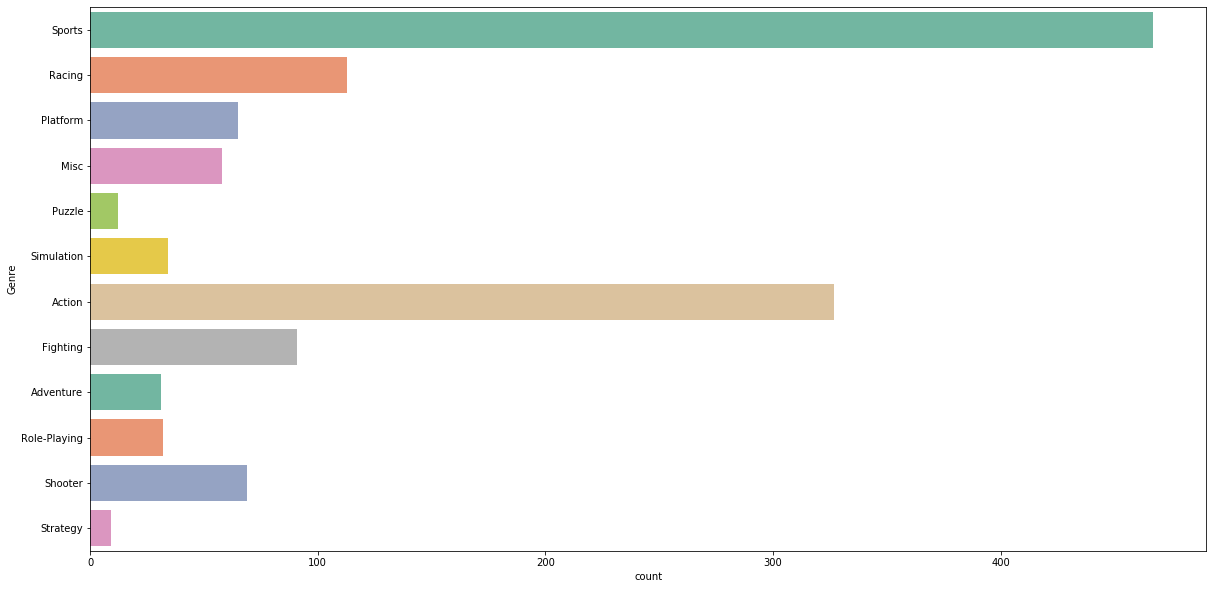

In [19]:
# Presen the number of games in each category
df_genre_sales = df_mod.copy(deep=True)
df_genre_sales = df_genre_sales[['Genre', 'Year_Published','NA_annual','EU_annual','JP_annual','Other_annual','Global_annual']]

plt.figure(figsize=(20,10))
f1 = sns.countplot(y=df_genre_sales['Genre'],palette="Set2")

f1 = plt.gcf()

Then we looked at the boxplot below of each genre by their global annual sales and found that most games in each genre has global annual sales less than 1 million per year, and there are couple of outliers for every genre, which means there are some games in each category that are much more popular than the rest games in that category. From the graph, I could see that the most sold games belongs to genre Sports.

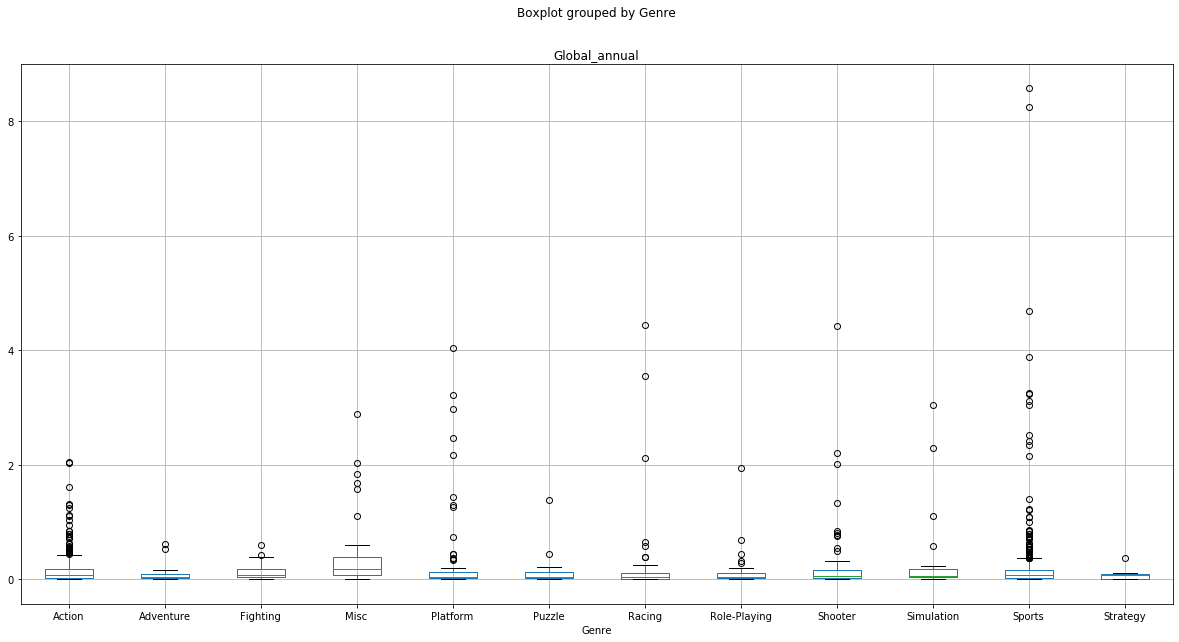

In [26]:
df_mod.boxplot(column='Global_annual', by='Genre',figsize=(20,10))

To see which game genre is the most popular, I plot a grouped bar plot of sales at different region by genre.

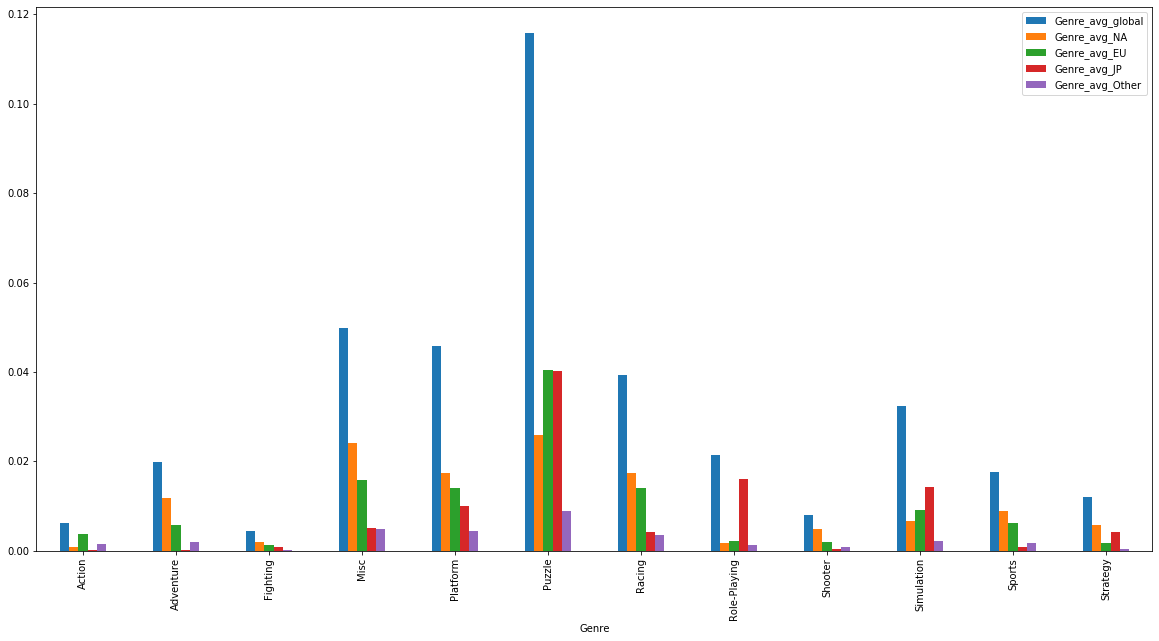

In [27]:
df_genre_avg = df_genre_sales.groupby('Genre').first()
df_genre_avg['Genre_count'] = df_genre_sales['Genre'].value_counts()
df_genre_avg['Genre_avg_global'] = df_genre_avg['Global_annual']/df_genre_avg['Genre_count']
df_genre_avg['Genre_avg_NA'] = df_genre_avg['NA_annual']/df_genre_avg['Genre_count']
df_genre_avg['Genre_avg_EU'] = df_genre_avg['EU_annual']/df_genre_avg['Genre_count']
df_genre_avg['Genre_avg_JP'] = df_genre_avg['JP_annual']/df_genre_avg['Genre_count']
df_genre_avg['Genre_avg_Other'] = df_genre_avg['Other_annual']/df_genre_avg['Genre_count']
df_genre_avg['Genre']=df_genre_avg.index
df_genre_avg.plot(x="Genre", y=["Genre_avg_global", "Genre_avg_NA", "Genre_avg_EU","Genre_avg_JP","Genre_avg_Other"],figsize=(20,10), kind="bar")

### 2. relationship between published year and popularity

We did some further analysis on how popularity of games related to their release time. To do so, I created a new dataframe that contains only Year column and annual sales of each game at different regions. To keep the dataframe consistent, after creating the dataframe, I dropped any inf and nan values before analyzing them. Then I plotted a countplot and the graph shows that there is a peak of game release between 2005-2008.

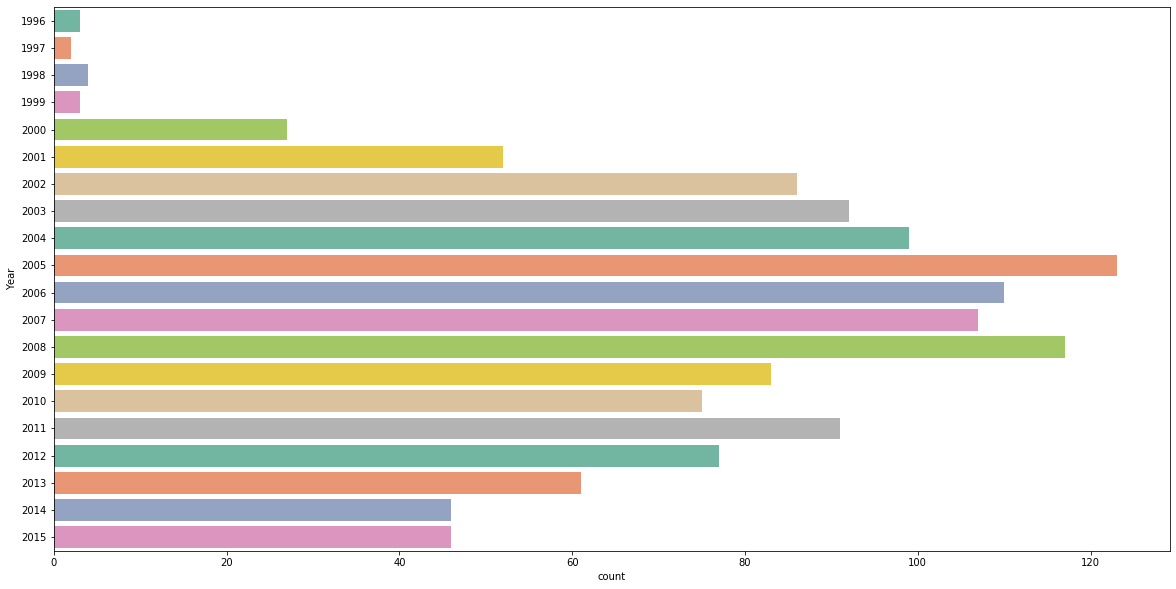

In [29]:
df_year_sales = df_mod.copy(deep=True)
df_year_sales = df_year_sales[['Year','Year_Published','NA_annual','EU_annual','JP_annual','Other_annual','Global_annual']]
df_year_sales = df_year_sales.replace([np.inf, -np.inf], np.nan)
df_year_sales = df_year_sales.dropna()

plt.figure(figsize=(20,10))
f2 = sns.countplot(y=df_year_sales['Year'],palette="Set2")

f2 = plt.gcf()

We grouped annual sales of games by their released year. Surprisingly, many annual sales are much smaller than we thought. So we scaled all the data by multiplying 100 to make the result more precise. Then we calculated average annual sales by each release year and plotted a line graph. The graph shows that the year with highest sales is 2015 at all regions, which is different from the year where the largest number of games are published. The graph also shows a trend of increasing sales from 2000 till now, and there is a small peak at around 1996 and 1998.

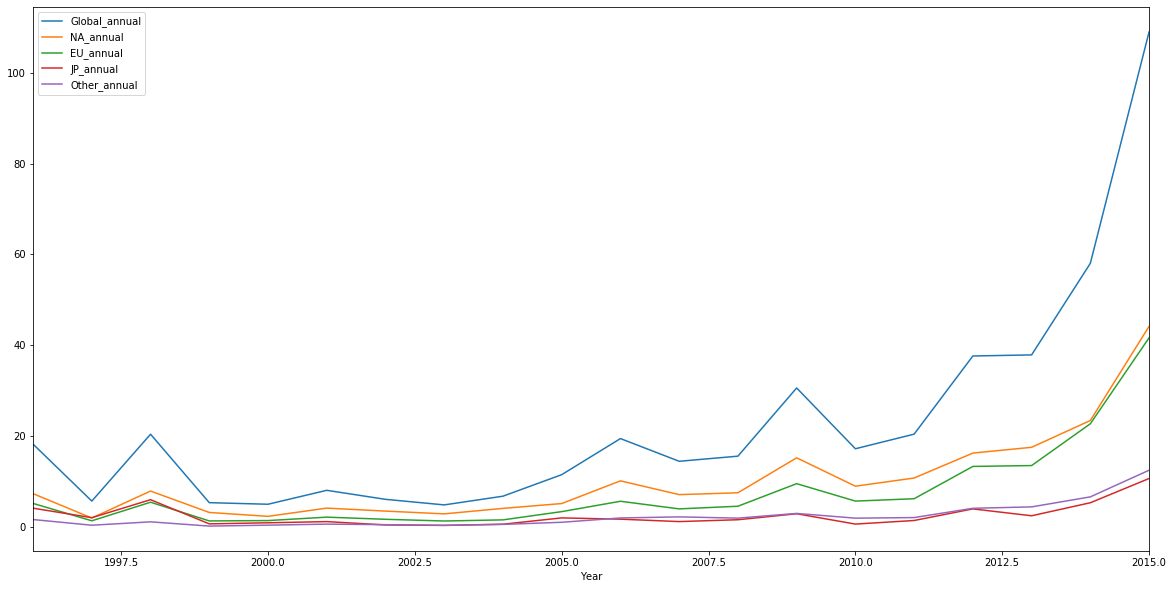

In [31]:
df_year_avg = df_year_sales.copy(deep=True)
df_year_avg['Global_annual'] = df_year_avg['Global_annual']*100
df_year_avg['NA_annual'] = df_year_avg['NA_annual']*100
df_year_avg['EU_annual'] = df_year_avg['EU_annual']*100
df_year_avg['JP_annual'] = df_year_avg['JP_annual']*100
df_year_avg['Other_annual'] = df_year_avg['Other_annual']*100
df_year_avg = df_year_avg.groupby('Year').mean()
df_year_avg = df_year_avg[['Global_annual','NA_annual','EU_annual','JP_annual','Other_annual']]
df_year_avg.plot(y=["Global_annual", "NA_annual", "EU_annual","JP_annual","Other_annual"], use_index = True,figsize=(20,10), kind="line")

## Discovering correlations

From our dataset, we encoded each category variables - Genre, Platform, Developer - with numerical variables. We decided to use labelencoder from sklearn package in order to carry out further analysis. Also, our significant level is 0.01.

In [34]:
lb_make = LabelEncoder()
df_mod["code_platform"] = lb_make.fit_transform(df_mod['Platform'])
df_mod['code_developer'] = lb_make.fit_transform(df_mod['Developer'])
df_mod['code_genre'] = lb_make.fit_transform(df_mod['Genre'])
df_mod.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,Name,Platform,Year,Genre,NA,EU,JP,Other,Global,Developer,Year_Published,Global_annual,NA_annual,EU_annual,JP_annual,Other_annual,code_platform,code_developer,code_genre
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.53,Nintendo,10,8.253000,4.136,2.896000,0.377000,0.845000,12,8,10
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,Nintendo,8,4.440000,1.960,1.595000,0.473750,0.411250,12,8,6
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,Nintendo,7,4.681429,2.230,1.561429,0.468571,0.421429,12,8,10
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,Nintendo,10,2.980000,1.128,0.914000,0.650000,0.288000,2,8,4
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.92,Nintendo,10,2.892000,1.396,0.918000,0.293000,0.284000,12,8,3


We started with developer to see if there exists a relationship between this categorical variable and global sales.

In [36]:
fit_developer = ols('Global ~  code_developer ', data=df_mod).fit()
fit_developer.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Global   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.200
Date:                Sat, 14 Mar 2020   Prob (F-statistic):              0.138
Time:                        18:33:32   Log-Likelihood:                -3474.4
No. Observations:                1308   AIC:                             6953.
Df Residuals:                    1306   BIC:                             6963.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0381      0.167      6.234      0.000       0.711       1.365
code_developer     0.0309      0.021      1.483      0.138      -0.010       0.072
==============================================================================
Omnibus:                     2451.013   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3728781.324
Skew:                          13.440   Prob(JB):                         0.00
Kurtosis:                     263.183   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can find that the p-value of code_developer is 0.005, which is much less than 0.01(the significant level). So we can conclude that developer significantly predict the global sales.

We then performed same analysis on platform and global sales.

In [38]:
fit_platform = ols('Global ~  code_platform', data=df_mod).fit()
fit_platform.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Global   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.02149
Date:                Sat, 14 Mar 2020   Prob (F-statistic):              0.883
Time:                        18:35:23   Log-Likelihood:                -3475.5
No. Observations:                1308   AIC:                             6955.
Df Residuals:                    1306   BIC:                             6965.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2110      0.223      5.430      0.000       0.773       1.649
code_platform     0.0033      0.022      0.147      0.883      -0.041       0.047
==============================================================================
Omnibus:                     2450.730   Durbin-Watson:                   0.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3720091.431
Skew:                          13.438   Prob(JB):                         0.00
Kurtosis:                     262.877   Cond. No.                         23.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We find that the p-values of code_platform is 0.441, which is larger than significant level. We can conclude that platform cannot predict the global sale.

In [40]:
fit_genre = ols('Global ~ code_genre ', data=df_mod).fit()
fit_genre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Global   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3261
Date:                Sat, 14 Mar 2020   Prob (F-statistic):              0.568
Time:                        18:37:32   Log-Likelihood:                -3475.3
No. Observations:                1308   AIC:                             6955.
Df Residuals:                    1306   BIC:                             6965.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1684      0.158      7.377      0.000       0.858       1.479
code_genre     0.0130      0.023      0.571      0.568      -0.032       0.058
==============================================================================
Omnibus:                     2449.402   Durbin-Watson:                   0.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3706919.523
Skew:                          13.423   Prob(JB):                         0.00
Kurtosis:                     262.415   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We find that the P-value of code_genre is 0.146, which is larger than significant level 0.01. So we can conclude that genre cannot predict the Global sales.

At this time, we want to check that whether platform and genre are confounding factors. So, we add platform and genre as multivariable with developer to do the linear regression.

In [41]:
fit_pla_dev = ols('Global ~  code_platform + code_developer ', data=df_mod).fit()
fit_pla_dev.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Global   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.109
Date:                Sat, 14 Mar 2020   Prob (F-statistic):              0.330
Time:                        18:39:09   Log-Likelihood:                -3474.4
No. Observations:                1308   AIC:                             6955.
Df Residuals:                    1305   BIC:                             6970.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0095      0.261      3.866      0.000       0.497       1.522
code_platform      0.0032      0.022      0.142      0.887      -0.041       0.047
code_developer     0.0309      0.021      1.482      0.139      -0.010       0.072
==============================================================================
Omnibus:                     2450.754   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3725716.220
Skew:                          13.437   Prob(JB):                         0.00
Kurtosis:                     263.076   Cond. No.                         33.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We find that the p-value of code_developer is 0.004, which is still less than significant level 0.01. So we can still conclude that developer significantly predict global sales and platform is not a confounding factors.

In [42]:
fit_dep_gen = ols('Global ~ code_developer + code_genre ', data=df_mod).fit()
fit_dep_gen.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Global   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.587
Date:                Sat, 14 Mar 2020   Prob (F-statistic):              0.205
Time:                        18:39:52   Log-Likelihood:                -3473.9
No. Observations:                1308   AIC:                             6954.
Df Residuals:                    1305   BIC:                             6969.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8731      0.236      3.700      0.000       0.410       1.336
code_developer     0.0363      0.022      1.688      0.092      -0.006       0.079
code_genre         0.0233      0.024      0.987      0.324      -0.023       0.070
==============================================================================
Omnibus:                     2448.159   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3700564.597
Skew:                          13.408   Prob(JB):                         0.00
Kurtosis:                     262.193   Cond. No.                         23.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can find that the p-value of code_developer is 0.001, which is still less than significant level 0.01. So we still can conclude that developer can predict the global sale and the genre is not a confounding factor.

In [43]:
fit = ols('Global ~  code_platform + code_developer + code_genre ', data=df_mod).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Global   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.058
Date:                Sat, 14 Mar 2020   Prob (F-statistic):              0.366
Time:                        18:40:45   Log-Likelihood:                -3473.9
No. Observations:                1308   AIC:                             6956.
Df Residuals:                    1304   BIC:                             6976.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8674      0.299      2.902      0.004       0.281       1.454
code_platform      0.0007      0.023      0.031      0.975      -0.044       0.045
code_developer     0.0363      0.022      1.685      0.092      -0.006       0.079
code_genre         0.0232      0.024      0.977      0.329      -0.023       0.070
==============================================================================
Omnibus:                     2448.113   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3699998.854
Skew:                          13.407   Prob(JB):                         0.00
Kurtosis:                     262.173   Cond. No.                         41.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We add these two another variables with developer together to do the linear regression. We find that the p-value if developer is 0.001, which is still less than significant level 0.01. We can conclude that developer predict the global sales.

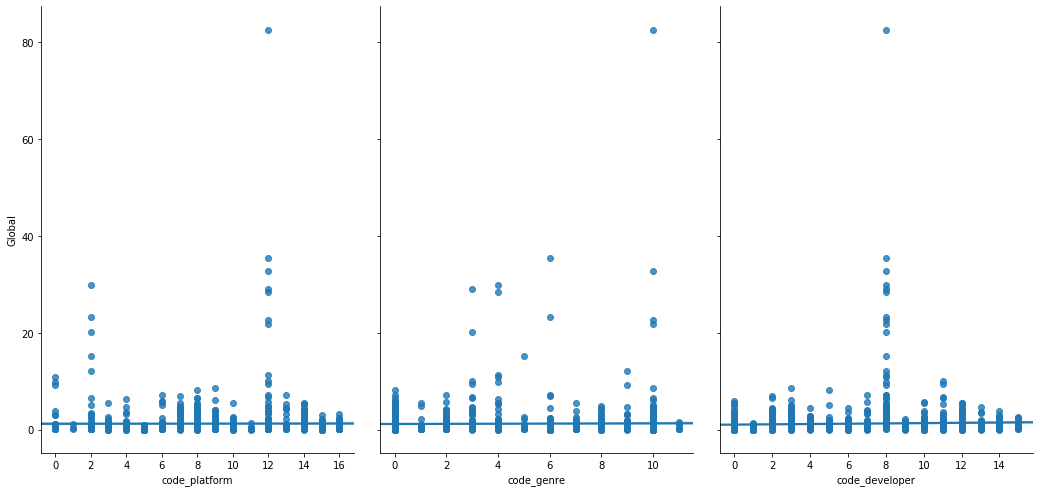

In [46]:
sns.pairplot(df_mod,x_vars=['code_platform','code_genre','code_developer'], y_vars='Global',height=7, aspect=0.7,kind='reg')

However, when we plot the least squares line, we can find that the model is low variance because each model has the similar lines. Therefore, at that time, we are wondering the accuracy of each model.

In [49]:
X = df_mod[['code_developer']]
Y = df_mod['Global']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .20, random_state = 40)
regr = linear_model.LinearRegression() 
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)
print('developer :', np.sqrt(metrics.mean_squared_error(Y_test,predicted)))

developer : 5.736738297004219


In [50]:
X = df_mod[['code_genre','code_developer','code_platform']]
Y = df_mod['Global']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .20, random_state = 40)
regr = linear_model.LinearRegression() 
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)
print('genre:', np.sqrt(metrics.mean_squared_error(Y_test,predicted)))

genre: 5.735915084354322


Compare to above two error data, we find that they are similar. So, adding genre and platform to predict does not effectively increase the accuracy(reduce the error). However, the error of developer prediction is big. So, we are guessing that there are any other factors(not included in out project) that affect the global sales.

# Ethics & Privacy

Our question is about what factors contribute to a game's popularity the most. Information and data both are open online. We can easily find the sale amount and rating point on the shopping page. Moreover, the relationship between these two topics is not an offensive or harmful research direction. The game company can not have any nefarious purpose.

Since the dataset used in this project are from Kaggle, the ethical issues regarding data collecting are minimal. The same could be said with data storage, as no data comes from a confidential database nor survey. We are concerned about the number and location of the region that the data covered. If the data only collects the information in some specific countries like Europe, it may cause some bias because the scope is a little small. However, after we look through the data, it includes a lot of different countries like Japan, Europe, the United States and so on. We do not need to worry about this bias. 

One concern raised during our initial inspection of dataset is the frequent occurrence of null values in Critics Score and User Score columns. Because we decided to drop all NaN values in the dataset, some games were excluded because they don't have enough rating information available. It is possible that we over-represented the gaming industry with our relatively small sample in 2016.


# Conclusion & Discussion

Following our analysis, we can see that there does exist a factor that plays a more dominant role in affecting global sales. Our analysis is aim to answer previous hypothesis in a more convincing way through the support of quantitative data.

- Games in certain genres (Simulation and Action) will have a higher popularity across the globe.
- Games developed by certain big-name company (Nintendo etc.) will be more popular compare to individual developers or smaller companies.
- Is there a relationship between platform and global sales?
- Is there a relationship between genre and global sales?
- Is there a relationship between developer and global sales?

From our initial exploratory data analysis, we found that the peak number of game release is around 2004 and 2008. We also found out that the most popular genre is Puzzle and the second-place is for Action. We also found out that only developer of a certain game has a correlation with the game's global sales. However, there is not a clearly shown correlation for genre and game developer(company) with global sales data. Our findings partially align with our hypothesis and does give some insights about the general gaming industry. Although some generes like action and puzzle games are more popular globally compare to others, game genre does not has a correlation with a game's popularity.

Overall, our data collection and analysis process is relatively naive and needs further refinement. However, we did look into what is possibly the most important factor regarding a game's popularity and thus shed some light on what to consider for stakeholders and individual developers when developing a game. However, the reality is way more complicated and take more factors into consideration compare to what was included in the dataset. 

For future development, we decided to expand our scope to data in later years and train a model to actually predict the global sales based on the factors we have in our dataset. We would also like to expand our analysis to different regions included in the dataset and see if each region has a favorable game genre and a different definition of popularity. Nevertheless, we will start with developing a more thorough dataset that includes more data that could be obtained through web scraping and other publicly available datasets.

# Team Contributions

- Siyu Meng
    - Do the data analysis
    - Transform the categorical variables to numerical variables
    - Find the linear regression between different factors
    - extra credit video acting
- Fengyuan Heying
    - Data Analysising
    - Single factor data frame initialing
    - Visualizing graph
    - extra credit video acting
- Zhilin Li
    - Initial background writeup
    - Initial dataset inspection
    - Final writeup of the ethics, conclusion, background, and hypothesis section.
    - extra credit video editing and acting
- Fei Dai
    - Data analyzing and visualization
    - Wrote team expectation in the project proposal
    - Project presentation video shooting
    - extra credit video acting
- Kanlin Wang
    - Cleaning the data
    - Helping the data analysis
    - Tried nonlinear function 
    - extra credit video acting